In [3]:
from sklearn.cluster import DBSCAN

In [4]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [9]:
plt.rcParams['figure.figsize'] = (10,10)

In [5]:
help (cluster)

Help on package sklearn.cluster in sklearn:

NAME
    sklearn.cluster

DESCRIPTION
    The :mod:`sklearn.cluster` module gathers popular unsupervised clustering
    algorithms.

PACKAGE CONTENTS
    _affinity_propagation
    _agglomerative
    _bicluster
    _birch
    _dbscan
    _dbscan_inner
    _feature_agglomeration
    _hierarchical_fast
    _k_means_elkan
    _k_means_fast
    _k_means_lloyd
    _kmeans
    _mean_shift
    _optics
    _spectral
    setup
    tests (package)

CLASSES
    sklearn.base.BaseEstimator(builtins.object)
        sklearn.cluster._affinity_propagation.AffinityPropagation(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
        sklearn.cluster._agglomerative.AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
            sklearn.cluster._agglomerative.FeatureAgglomeration(sklearn.cluster._agglomerative.AgglomerativeClustering, sklearn.cluster._feature_agglomeration.AgglomerationTransform)
        sklearn.cluster._birch.Birc

In [6]:
X , y = datasets.make_blobs(n_samples=1000, centers = 4, n_features=2)

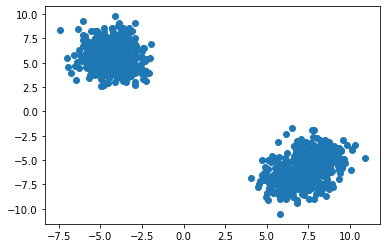

In [7]:
plt.scatter(X[:,0], X[:,1])

In [16]:
X , y = datasets.make_blobs(n_samples=1000, centers = 4, n_features=2, cluster_std=2.5)

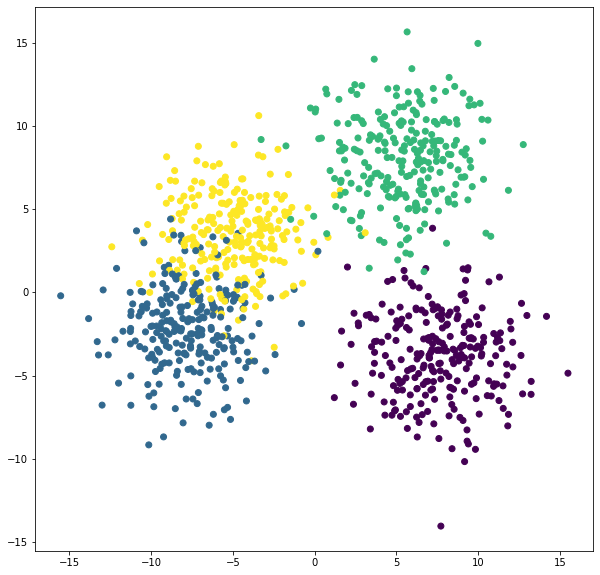

In [17]:
plt.scatter(X[:,0], X[:,1], c=y)

In [19]:
model = cluster.KMeans (4)

In [20]:
model.fit(X)

KMeans(n_clusters=4)

In [21]:
model.inertia_

11524.54000749835

In [22]:
cl = model.predict(X)

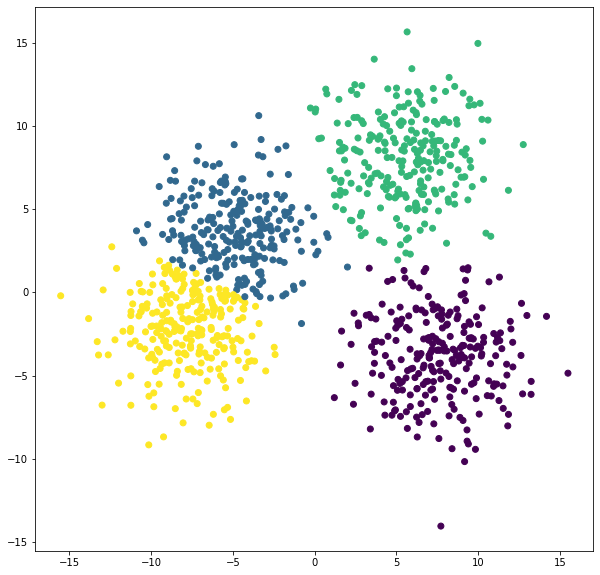

In [23]:
plt.scatter(X[:,0], X[:,1], c=cl)

In [25]:
inertia = []
for k in range (2,6):
    model = cluster.KMeans (k)
    model.fit(X)
    inertia.append(model.inertia_)

In [26]:
inertia

[35348.86316473256, 17100.99307219863, 11524.54000749835, 10313.41170931616]

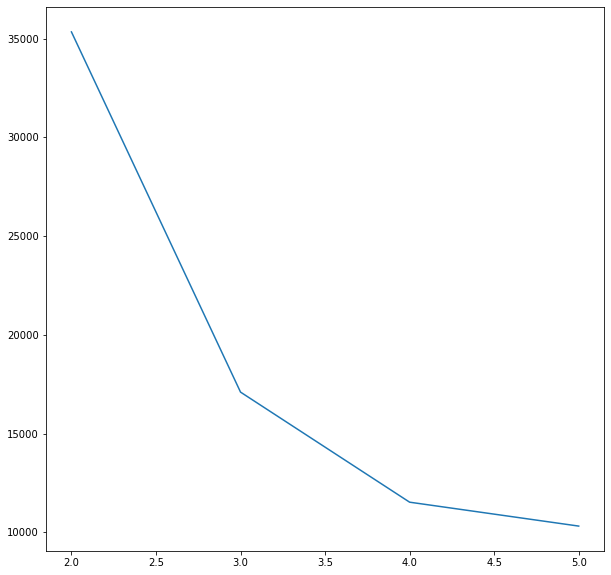

In [27]:
# 4 es un buen numero de clusters
plt.plot(range(2,6), inertia)

In [28]:
model = cluster.MeanShift()

In [29]:
help(cluster.MeanShift)

Help on class MeanShift in module sklearn.cluster._mean_shift:

class MeanShift(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  MeanShift(*, bandwidth=None, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=None, max_iter=300)
 |  
 |  Mean shift clustering using a flat kernel.
 |  
 |  Mean shift clustering aims to discover "blobs" in a smooth density of
 |  samples. It is a centroid-based algorithm, which works by updating
 |  candidates for centroids to be the mean of the points within a given
 |  region. These candidates are then filtered in a post-processing stage to
 |  eliminate near-duplicates to form the final set of centroids.
 |  
 |  Seeding is performed using a binning technique for scalability.
 |  
 |  Read more in the :ref:`User Guide <mean_shift>`.
 |  
 |  Parameters
 |  ----------
 |  bandwidth : float, default=None
 |      Bandwidth used in the RBF kernel.
 |  
 |      If not given, the bandwidth is estimated using
 |      sklearn.cl

In [32]:
model.fit(X)

MeanShift()

In [33]:
cl_ms = model.predict(X)

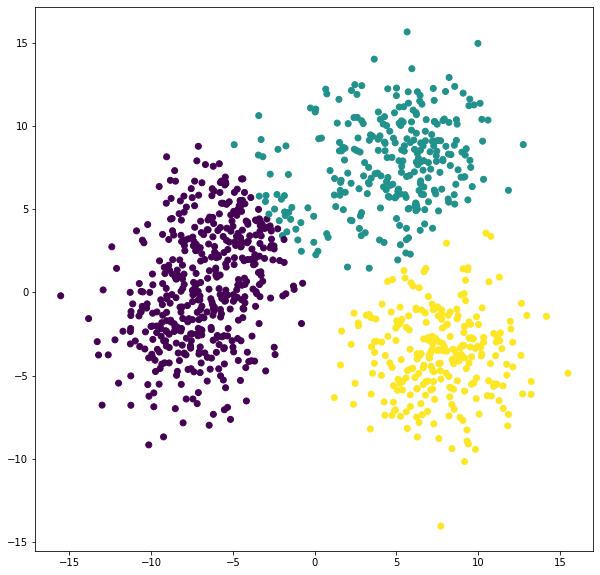

In [34]:
plt.scatter(X[:,0], X[:,1], c=cl_ms)

In [35]:
help (cluster.DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. This is the most
 |      important DBSCAN parameter to choose appropriately for your data set
 |      and distance function.
 |  
 |  min_sam

In [45]:
model = cluster.DBSCAN(eps=0.8, min_samples=10)

In [46]:
cl_db = model.fit_predict(X)

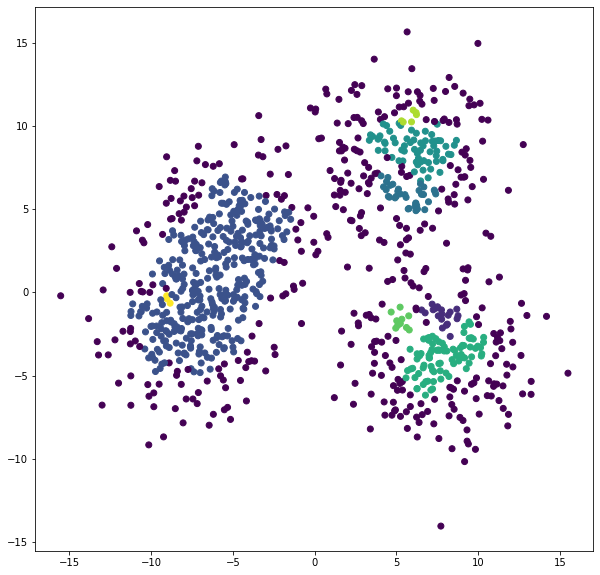

In [47]:
plt.scatter(X[:,0], X[:,1], c=cl_db)